<a href="https://colab.research.google.com/github/Swayamprakashpatel/Sol_ME/blob/main/Sol_ME_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DRUG - LIPID SOLUBILITY PREDICTOR**

Choose any of the below option.
:- *If First option through error then add LogP values manually in second option. You may use XlogP predictor for it.*

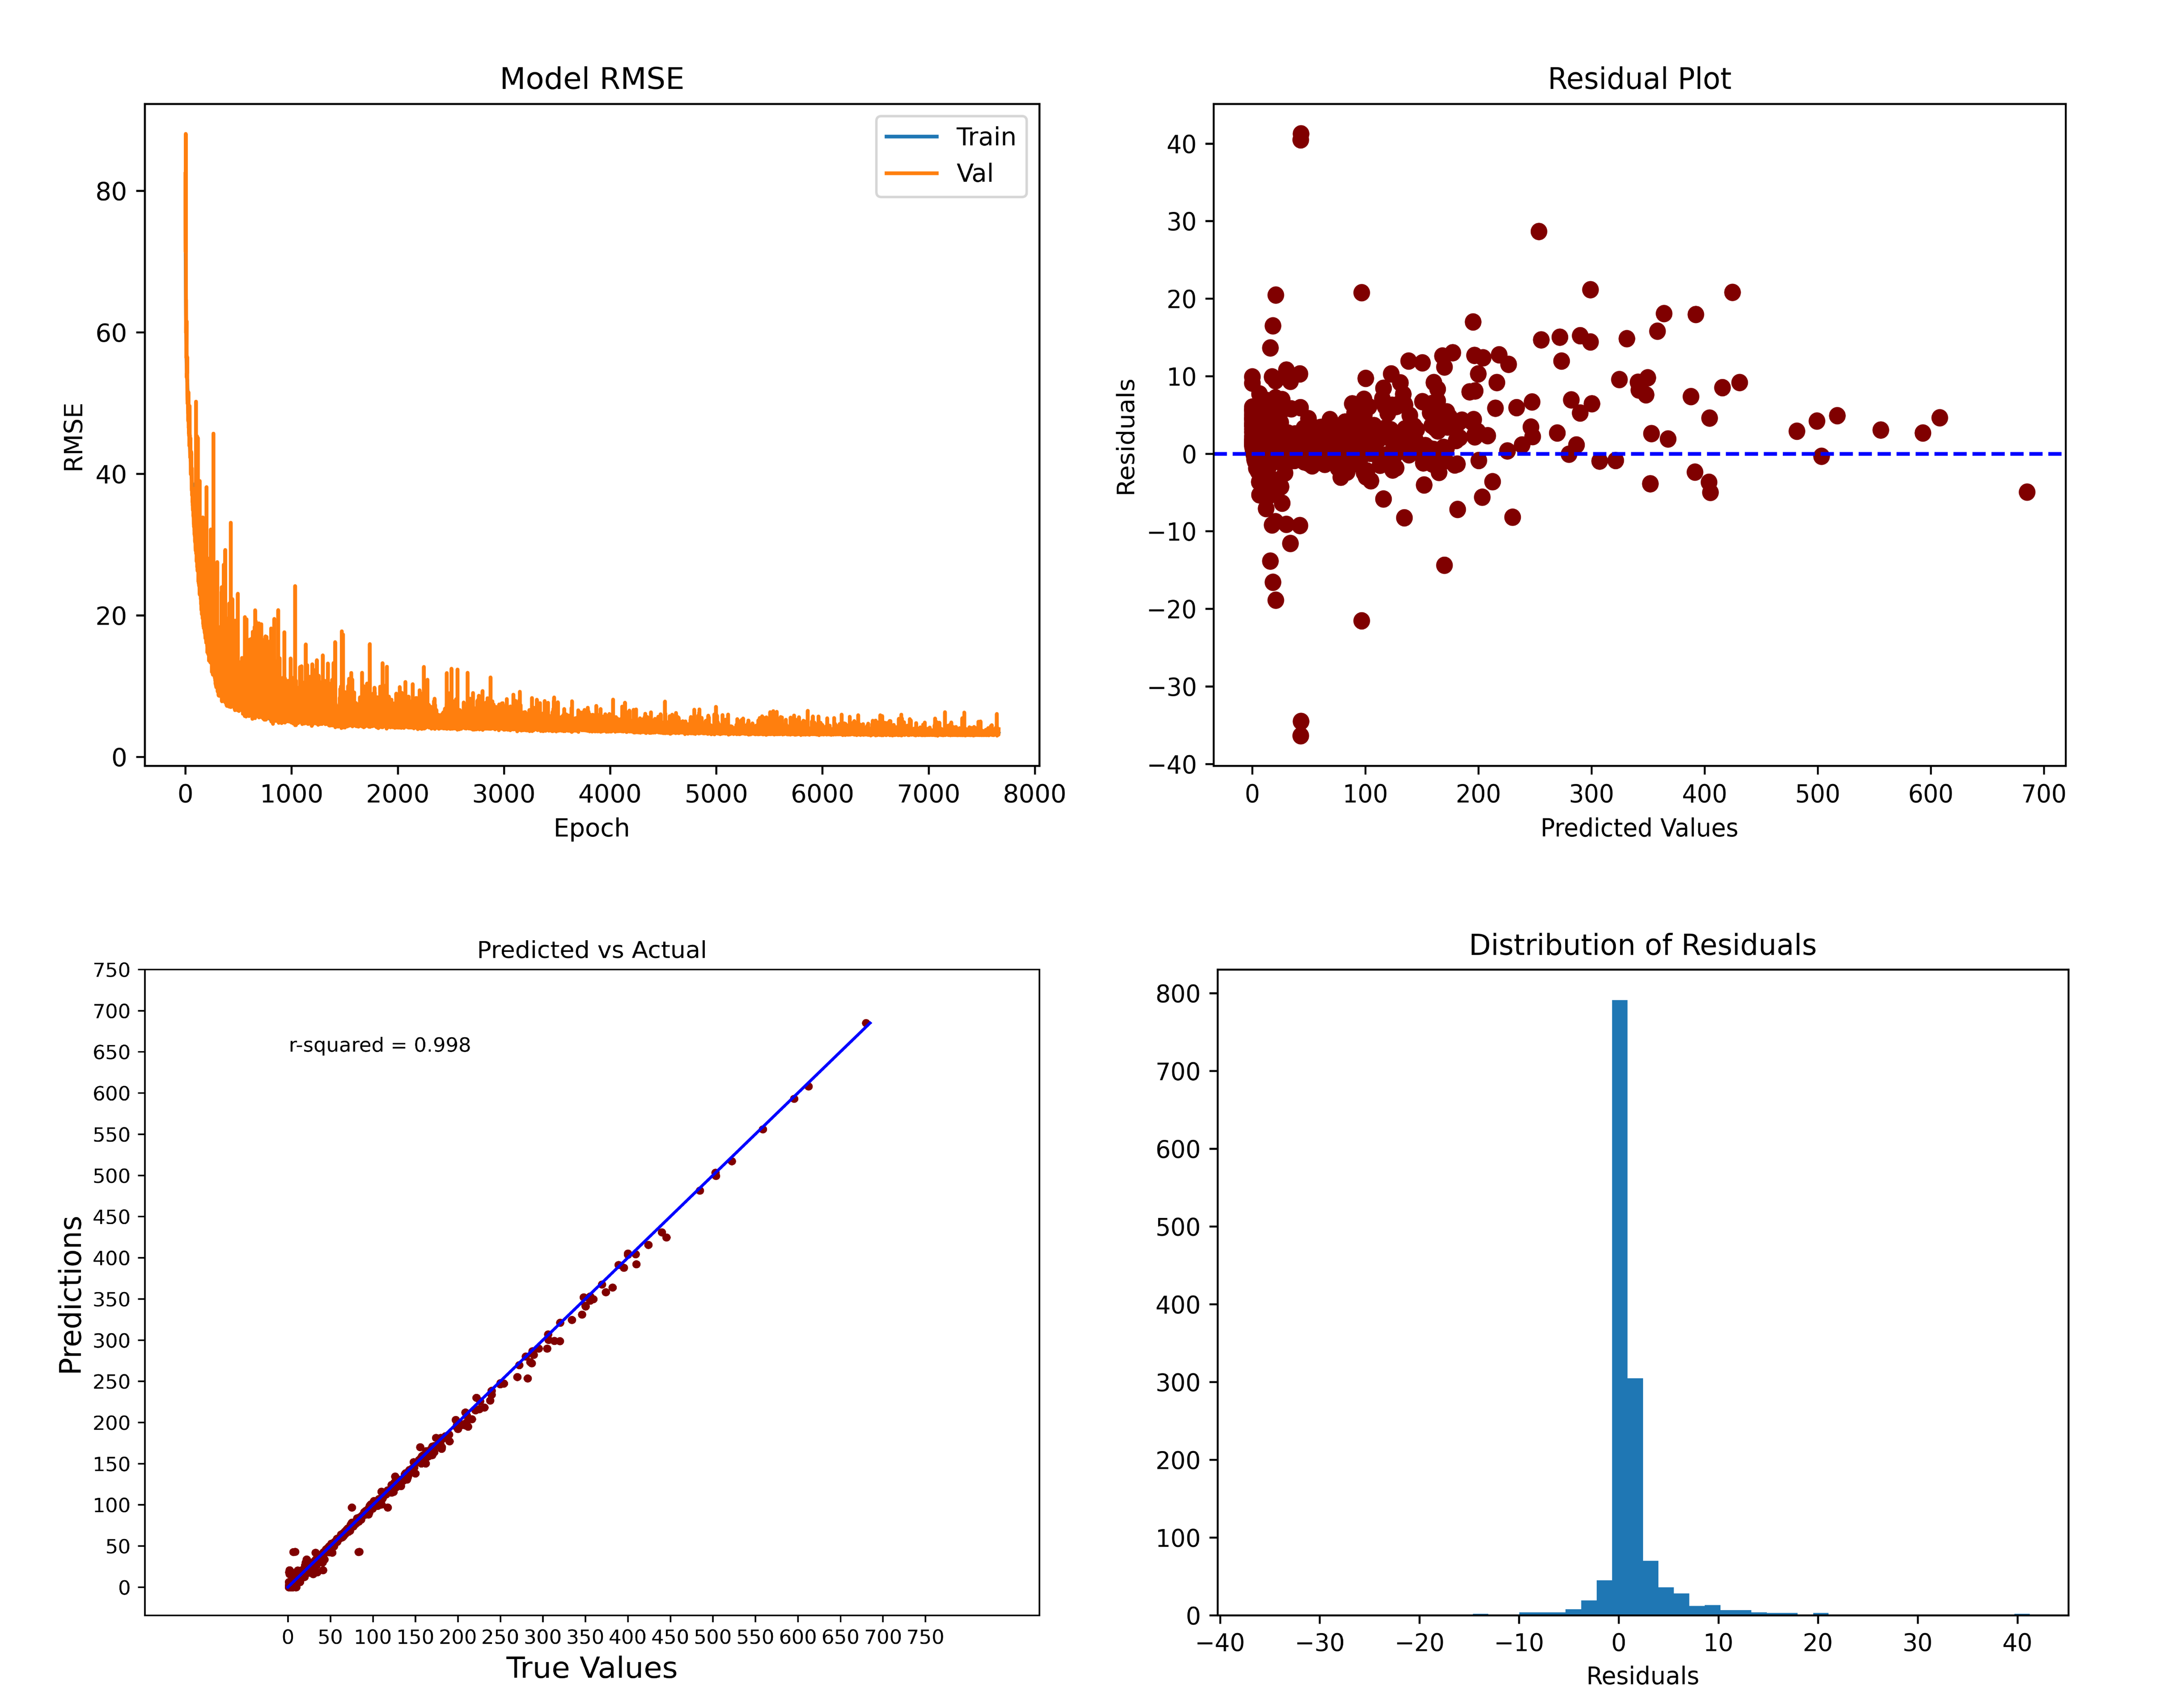

In [ ]:
!pip install pubchempy
!pip install gdown

import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
import gdown

file_id = '19vWbg_CKrTmgTupKjVsNerZCQGo-gi0n'  # Replace with your actual file ID
destination = '/content/sample_data/Sol_ME.hdf5'  # Desired destination path

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

# Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile=False)

# Drug and Excipient CID
Drug_CID = 135398740 #@param {type:"number"}
Excipient_CID = 10850 #@param {type:"number"}

# Fetch logP and Mol. Wt of Drug and Excipient
logp_D = pcp.Compound.from_cid(Drug_CID).xlogp
logp_C = pcp.Compound.from_cid(Excipient_CID).xlogp
Molwt_of_Drug = pcp.Compound.from_cid(Drug_CID).molecular_weight
Molwt_of_Excipient = pcp.Compound.from_cid(Excipient_CID).molecular_weight

# Check if any value is not available
if logp_D is None or logp_C is None or Molwt_of_Drug is None or Molwt_of_Excipient is None:
    print("USE OPTION - 2 [LOG P OR MOL. WT NOT AVAILABLE]")
else:
    # Convert logP and Mol. Wt values to the required units
    logp_D = float(logp_D) / 100
    logp_C = float(logp_C) / 100
    Molwt_of_Drug = float(Molwt_of_Drug) / 1000
    Molwt_of_Excipient = float(Molwt_of_Excipient) / 1000

    # Fetch Fingerprint of Drug and Carrier
    CID_D = pcp.Compound.from_cid(Drug_CID)
    CID_E = pcp.Compound.from_cid(Excipient_CID)
    FPD = CID_D.cactvs_fingerprint
    FPE = CID_E.cactvs_fingerprint

    # Combine all features into a single list
    List1 = [Molwt_of_Drug, Molwt_of_Excipient, logp_D, logp_C]
    List2 = list(FPD)
    List3 = list(FPE)
    List = List1 + List2 + List3

    # Convert to DataFrame and prepare for prediction
    t = pd.DataFrame(np.array(List).reshape(-1, len(List)))
    dataset1 = t.values
    X_Predict = (dataset1[:, 0:1766].astype(float))

    # Make prediction
    Y_prediction = model.predict(X_Predict)
    print(Y_prediction, "mg/ml")


In [ ]:
#@title #**OPTION : 2** - Insert PubChem CID of Drug and Carrier (Oil, Surfactant, Cosurfactant), LogP and Moleculr Weights
!!pip install pubchempy
!pip install gdown

import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
import gdown

file_id = '19vWbg_CKrTmgTupKjVsNerZCQGo-gi0n'  # Replace with your actual file ID
destination = '/content/sample_data/Sol_ME.hdf5'  # Desired destination path

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

# Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile=False)



Drug_CID =  24872560#@param {type:"number"}
Excipient_CID =  3314#@param {type:"number"}
LogP_of_Drug =  11.3#@param {type:"number"}
LogP_of_Excipient =  2#@param {type:"number"}
MolWt_of_Drug =  11.3#@param {type:"number"}
MolWt_of_Excipient =  2#@param {type:"number"}

#LOGP of DRUG AND CARRIER

logp_D = LogP_of_Drug/100

logp_C = LogP_of_Excipient/100

#Mol.Wt of Drug and Carrier
MolWt_of_Drug = MolWt_of_Drug/1000
MolWt_of_Excipient =  MolWt_of_Excipient/1000

#FINGERPRINT OF DRUG AND CARRIER
CID_D = pcp.Compound.from_cid(Drug_CID)
CID_E = pcp.Compound.from_cid(Excipient_CID)

FPD = CID_D.cactvs_fingerprint
FPE = CID_E.cactvs_fingerprint

List1 = [MolWt_of_Drug, MolWt_of_Excipient, logp_D, logp_C]

List2 = list(FPD)
List3 = list(FPE)
List = List1 + List2 + List3


import pandas as pd
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))

#@title RUN FOR PREDICTION


dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1766].astype(float))
#print(X_Predict)
#print(X_Predict.shape)
#print(X_Predict.dtype)

Y_prediction = model.predict(X_Predict)

print(Y_prediction, "mg/ml")

In [ ]:
#@title #**OPTION : 3** - UPLOAD EXCEL (Predict.xlsx) for Multiple Prediction : For Downloading Predict.xlsx [CLICK HERE](https://github.com/Swayamprakashpatel/Sol_ME/raw/main/Predict.xlsx) - **Do not rename File Name**
!pip install pubchempy
!pip install googledrivedownloader
!pip install openpyxl
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd
from google.colab import files
uploaded = files.upload()

gdd.download_file_from_google_drive(file_id='19vWbg_CKrTmgTupKjVsNerZCQGo-gi0n',
                                   dest_path='/content/sample_data/Sol_ME.hdf5',
                                   unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile= False)

df = pd.read_excel('/content/Predict.xlsx')
df1 = df.iloc[:, 0:1]
cidvals = df1['Drug_CID']
componentFingerprint = []
for cid in cidvals:
  c = pcp.Compound.from_cid(cid)
  componentFingerprint.append(c.cactvs_fingerprint)
  tm.sleep(0.1)

CD1 = df1.assign(fp=componentFingerprint)
i = 1
for  componentFingerprint in c.cactvs_fingerprint:
    CD1['fp'] = CD1['fp'].astype(str)
    CD1['fp'+str (i)] = CD1['fp'].str[i-1:i]
    i = i+ 1
#print(componentFingerprint)
#print(CD1)

# CID to Fingerprint: Second Drug
df = pd.read_excel('/content/Predict.xlsx')
df2 = df.iloc[:, 1:2]
cidvals = df2['Excipient_CID']
componentFingerprint = []
for cid in cidvals:
  c = pcp.Compound.from_cid(cid)
  componentFingerprint.append(c.cactvs_fingerprint)
  tm.sleep(0.1)

CD2 = df2.assign(fp=componentFingerprint)
i = 1
for  componentFingerprint in c.cactvs_fingerprint:
    CD2['fp'] = CD2['fp'].astype(str)
    CD2['fp'+str (i)] = CD2['fp'].str[i-1:i]
    i = i+ 1
#print(componentFingerprint)
#print(CD2)

CID= pd.DataFrame(pd.concat([CD1,CD2], axis = 1)) # Two CID Joined
CID_Data = CID.drop(['Drug_CID', 'fp','Excipient_CID'], axis=1, inplace = False)
OTHER = df.iloc[:, 2:6]

X_Predict = pd.DataFrame(pd.concat([CID_Data, OTHER],axis = 1))

X_Predict = X_Predict.values
#X_Predict.dtype = int
X_Predict = (X_Predict[:,0:1766].astype(float))

Y_prediction = model.predict(X_Predict)

print(Y_prediction, "mg/ml")

#@title Download Results in Excel
result = pd.DataFrame(Y_prediction)
Intact = pd.DataFrame(pd.concat([df1,df2,result], axis = 1))
Intact.to_excel("Solubility_Result.xlsx")
files.download('Solubility_Result.xlsx')

In [ ]:
#@title  #**OPTION : 4** - If No CID available: Add SMILES, LogP and Mol. Wt for both Drug and Excipient and Run Both Cells (Shift + Enter)
#%%capture
!pip install pubchempy
!pip install padelpy
!pip install googledrivedownloader
from padelpy import from_smiles
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='19vWbg_CKrTmgTupKjVsNerZCQGo-gi0n',
                                   dest_path='/content/sample_data/SOLModel.hdf5',
                                   unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile= False)

Drug_SMILE = "C1CO1.C(C(CO)O)O" #@param {type:"string"}
Excipient_SMILE = "COC1=C(C=CC(=C1)C=CC(=O)O)O" #@param {type:"string"}
LogP_of_Drug =  11.3#@param {type:"number"}
LogP_of_Excipient =  2#@param {type:"number"}
MolWt_of_Drug =  11.3#@param {type:"number"}
MolWt_of_Excipient =  2#@param {type:"number"}

#LOGP of DRUG AND CARRIER

logp_D = LogP_of_Drug/100

logp_C = LogP_of_Excipient/100

#Mol.Wt of Drug and Carrier
MolWt_of_Drug = MolWt_of_Drug/1000
MolWt_of_Excipient =  MolWt_of_Excipient/1000

CID_D = from_smiles(Drug_SMILE, fingerprints=True, descriptors=False)
CID_E = from_smiles(Excipient_SMILE, fingerprints=True, descriptors=False)

FPD = list(CID_D.values())
FPE = list(CID_E.values())

List1 = [MolWt_of_Drug, MolWt_of_Excipient, logp_D, logp_C]

List2 = list(FPD)
List3 = list(FPE)
List = List1 + List2 + List3

import pandas as pd
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))

#@title RUN FOR PREDICTION


dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1766].astype(float))
#print(X_Predict)
#print(X_Predict.shape)
#print(X_Predict.dtype)

Y_prediction = model.predict(X_Predict)

print(Y_prediction, "mg/ml")

In [ ]:
#@title  #**OPTION : 5** - UPLOAD EXCEL (Predict_SMILE.xlsx) for Multiple Prediction and Run Cell- For Downloading Predict_SMILE.xlsx [CLICK HERE](https://github.com/Swayamprakashpatel/Sol_ME/raw/main/Predict_SMILE.xlsx)- **DO NOT RENAME FILE NAME**

#%%capture

!pip install pubchempy
!pip install padelpy
!pip install googledrivedownloader
from padelpy import from_smiles
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='19vWbg_CKrTmgTupKjVsNerZCQGo-gi0n',
                                   dest_path='/content/sample_data/Sol_ME.hdf5',
                                   unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile=False)

from google.colab import files
uploaded = files.upload()

# Load input data from Excel
input_file_path = '/content/Predict_SMILE.xlsx'
data = pd.read_excel(input_file_path)

# Preprocess the data
def preprocess_data(row):
    Drug_SMILE = row['Drug_SMILE']
    Excipient_SMILE = row['Excipient_SMILE']
    LogP_of_Drug = row['LogP_of_Drug'] / 100
    LogP_of_Excipient = row['LogP_of_Excipient'] / 100
    MolWt_of_Drug = row['MolWt_of_Drug'] / 1000
    MolWt_of_Excipient = row['MolWt_of_Excipient'] / 1000

    CID_D = from_smiles(Drug_SMILE, fingerprints=True, descriptors=False)
    CID_E = from_smiles(Excipient_SMILE, fingerprints=True, descriptors=False)

    FPD = list(CID_D.values())
    FPE = list(CID_E.values())

    List1 = [MolWt_of_Drug, MolWt_of_Excipient, LogP_of_Drug, LogP_of_Excipient]

    List2 = list(FPD)
    List3 = list(FPE)
    List = List1 + List2 + List3

    return List

preprocessed_data = data.apply(preprocess_data, axis=1)
X_Predict = np.array(preprocessed_data.tolist())

# Perform predictions
Y_prediction = model.predict(X_Predict)

# Add predictions to the DataFrame
data['Prediction'] = Y_prediction

# Save the results to an Excel file
output_file_path = 'Predict_SMILE_Result.xlsx'
data.to_excel(output_file_path, index=False)

# Provide a download link for the user
from google.colab import files
files.download(output_file_path)

In [ ]:
#@title **Experimental Cell - Not for End User** For Multiple SMILES Prediction upload Predict_SMILE.xlsx and (Shift + Enter)

!pip install pubchempy
!pip install padelpy
from padelpy import from_smiles
import pandas as pd
import numpy as np
from keras.models import load_model
from concurrent.futures import ThreadPoolExecutor

from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='19vWbg_CKrTmgTupKjVsNerZCQGo-gi0n',
                                   dest_path='/content/sample_data/Sol_ME.hdf5',
                                   unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile=True)


from google.colab import files
uploaded = files.upload()

#Load input data from Excel
input_file_path = '/content/Predict_SMILE.xlsx'
data = pd.read_excel(input_file_path)

# Preprocess the data
def preprocess_data(row):
    Drug_SMILE = row['Drug_SMILE']
    Excipient_SMILE = row['Excipient_SMILE']
    LogP_of_Drug = row['LogP_of_Drug'] / 100
    LogP_of_Excipient = row['LogP_of_Excipient'] / 100
    MolWt_of_Drug = row['MolWt_of_Drug'] / 1000
    MolWt_of_Excipient = row['MolWt_of_Excipient'] / 1000

    CID_D = from_smiles(Drug_SMILE, fingerprints=True, descriptors=False)
    CID_E = from_smiles(Excipient_SMILE, fingerprints=True, descriptors=False)

    FPD = list(CID_D.values())
    FPE = list(CID_E.values())

    List1 = [MolWt_of_Drug, MolWt_of_Excipient, LogP_of_Drug, LogP_of_Excipient]

    List2 = list(FPD)
    List3 = list(FPE)
    List = List1 + List2 + List3

    return List

# Function to generate fingerprints for a chunk of data
def generate_fingerprints(data_chunk):
    return np.array([preprocess_data(row) for _, row in data_chunk.iterrows()])

# Split data into chunks for parallel processing
chunk_size = 100  # Adjust this value based on your available memory
data_chunks = [data[i:i+chunk_size] for i in range(0, len(data), chunk_size)]

# Perform predictions using parallel processing
Y_predictions = []
with ThreadPoolExecutor() as executor:
    for chunk_predictions in executor.map(generate_fingerprints, data_chunks):
        Y_prediction = model.predict(chunk_predictions)
        Y_predictions.extend(Y_prediction)

# Add predictions to the DataFrame
data['Prediction'] = Y_predictions

# Save the results to an Excel file
output_file_path = 'Predict_SMILE_Result.xlsx'
data.to_excel(output_file_path, index=False)

# Provide a download link for the user
from google.colab import files
files.download(output_file_path)


<ipython-input-1-09e2dc1708ba>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=importance_df, palette='muted')


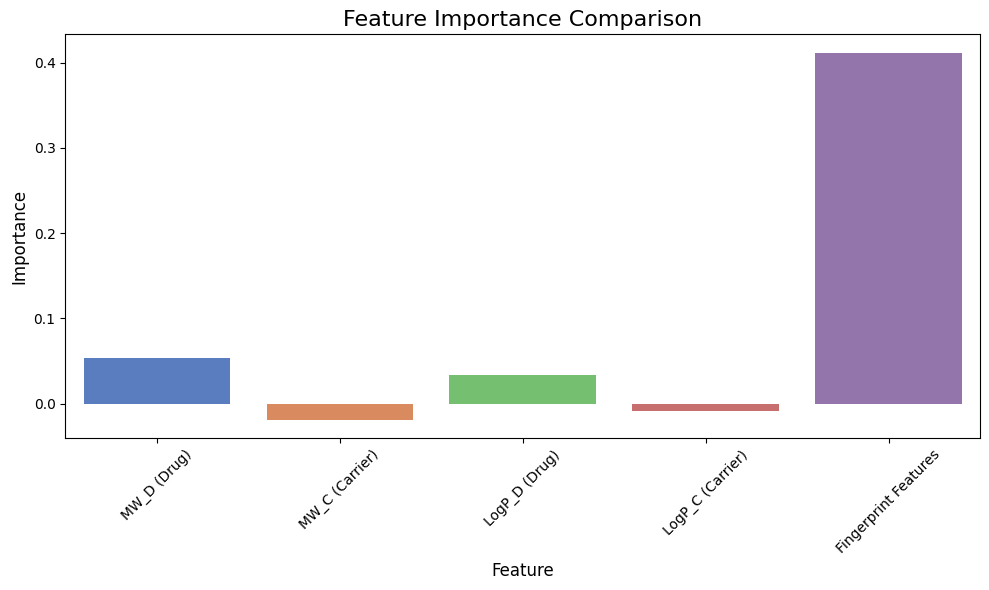

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for feature importance
data = {
    'Feature': ['MW_D (Drug)', 'MW_C (Carrier)', 'LogP_D (Drug)', 'LogP_C (Carrier)', 'Fingerprint Features'],
    'Importance': [0.053738, -0.018976, 0.033523, -0.008248, 0.4115499530233745]
}

# Convert to DataFrame
importance_df = pd.DataFrame(data)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='muted')
plt.title('Feature Importance Comparison', fontsize=16)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Feature', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Save the plot
plt.savefig('Feature_Importance_Comparison.png', dpi=1200)
